LINK TO COLLAB:https://colab.research.google.com/drive/1sg4L3NmSej6g231TNrMhi5m-rY37Ugw_

Accuracy (MNB) : 85.29%
Cross Validation Accuracy (MNB): 81.89%
Accuracy (RF) : 85.07%
Cross Validation Accuracy (RF): 85.22%
Accuracy (KNN) : 85.86%
Cross Validation Accuracy (KNN): 85.05%
Accuracy (LR) : 89.37%
Cross Validation Accuracy (LR): 88.54%
Accuracy (SVM) : 88.24%
Cross Validation Accuracy (SVM): 86.98%
Accuracy (DT) : 81.45%
Cross Validation Accuracy (DT): 80.95%
Accuracy (MLP) : 86.43%
Cross Validation Accuracy (MLP): 86.66%


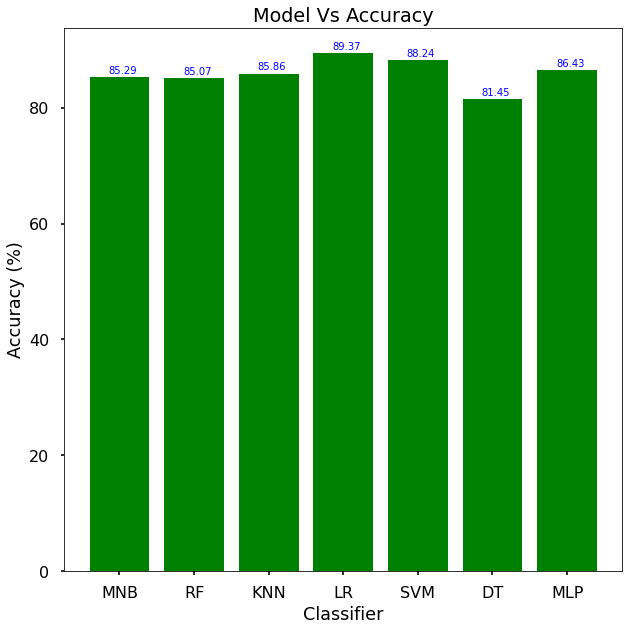

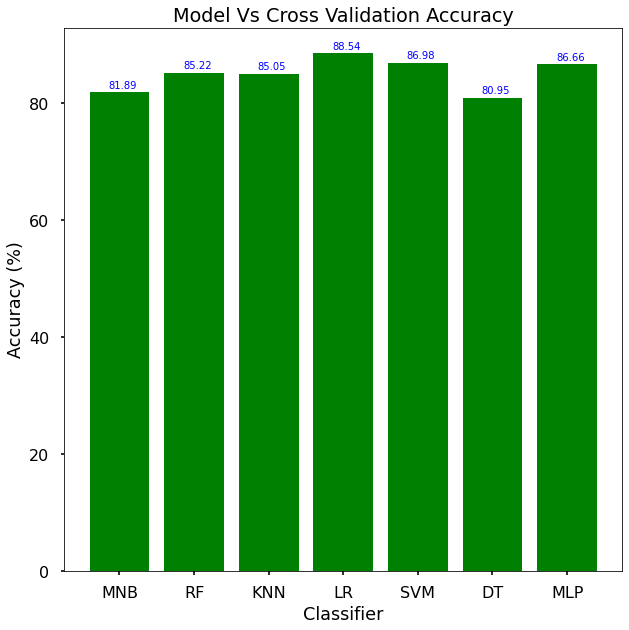

In [ ]:
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

"""**Disease Symptom dataset** was created in a separate python program.
**Dataset scrapping** was done using **NHP website** and **wikipedia data**
"""

# Load Dataset scraped from NHP (https://www.nhp.gov.in/disease-a-z) & Wikipedia
# Scrapping and creation of dataset csv is done in a separate program
df_comb = pd.read_csv("dis_sym_dataset_comb.csv")

# creation of features and label for training the models
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

"""*Train Test Split*"""

# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)
X=x_train
Y=y_train

# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []

"""# **Multinomial Naive Bayes Classifier**
MNB works better on discrete features and the multinomial distribution usually requires integer counts. However, it also works with fractional counts such tf-idf.
"""

# Multinomial NB Classifier
mnb = MultinomialNB()
mnb = mnb.fit(X, Y)
# prediction of labels for the test data
mnb_pred = mnb.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")

# Cross Validation Accuracy MNB
# performing cross validation with 5 different splits
scores_mnb = cross_val_score(mnb, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

"""# **Random Forest Classifier**
RF classifier is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and take the average to improve predicting accuracy.
"""

# RF Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf = rf.fit(X, Y)
# prediction of labels for the test data
rf_pred = rf.predict(x_test)
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

# Cross Validation Accuracy RF
# performing cross validation with 5 different splits
scores_rf = cross_val_score(rf, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

"""# **K-Nearest Neighbor Classifier**
The principle behind nearest neighbor method is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. No. of samples used here is 7.
"""

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
knn = knn.fit(X, Y)
# prediction of labels for the test data
knn_pred = knn.predict(x_test)
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")

# Cross Validation Accuracy KNN
# performing cross validation with 5 different splits
scores_knn = cross_val_score(knn, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")

"""# **Logistic Regression Classifier**
Logistic Regression uses OvR (One Vs Rest) approach when classification is multi class.
"""

# LR Classifier
lr = LogisticRegression()
lr = lr.fit(X, Y)
# prediction of labels for the test data
lr_pred = lr.predict(x_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
accuracy_list.append(acc_lr)
model_list.append("LR")
print(f"Accuracy (LR) : {acc_lr}%")

# Cross Validation Accuracy LR
# performing cross validation with 5 different splits
scores_lr = cross_val_score(lr, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

"""# **Support Vector Machine Classifier**
SVM follows OvO (One Vs One) scheme when dealing with multi class classification. SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. This seems simple for binary class but the complexity is increased when we have multiple classes. In our classification problem we have 261 classes (equal to diseases).
"""

# SVM Classifier
svm = SVC()
svm = svm.fit(X, Y)
# prediction of labels for the test data
svm_pred = svm.predict(x_test)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

# Cross Validation Accuracy SVM
# performing cross validation with 5 different splits
scores_svm = cross_val_score(svm, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

"""# **Decision Tree Classifier**
DT is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression. DT follows a tree like structure to reach to a decision whether the given sample under consideration belong to which class.
"""

# DT Classifier
dt = DecisionTreeClassifier()
dt = dt.fit(X, Y)
# prediction of labels for the test data
dt_pred = dt.predict(x_test)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# Cross Validation Accuracy DT
# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

"""# **Multilayer Perceptron Classifier**
MLP is a feed forward ANN (Artificial Neural Network) which is extensively used for classification purpose.
"""

# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
mlp = mlp.fit(X, Y)
# prediction of labels for the test data
mlp_pred = mlp.predict(x_test)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

"""# **Accuracy Comparison Plot for all the classifiers**"""

# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='green')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()

"""# **Cross Validation Accuracy Comparison Plot for all the classifiers**"""

# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, cross_accuracy_list, color='green')
for i, j in enumerate(cross_accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()

In [ ]:
import re
from googlesearch import search
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup

# Take input a disease and return the content of wikipedia's infobox for that specific disease

def diseaseDetail(term):
    diseases=[term]
    ret=term+"\n"
    for dis in diseases:
        # search "disease wilipedia" on google 
        query = dis+' wikipedia'
        for sr in search(query,tld="co.in",stop=10,pause=0.5): 
            # open wikipedia link
            match=re.search(r'wikipedia',sr)
            filled = 0
            if match:
                wiki = requests.get(sr,verify=False)
                soup = BeautifulSoup(wiki.content, 'html5lib')
                # Fetch HTML code for 'infobox'
                info_table = soup.find("table", {"class":"infobox"})
                if info_table is not None:
                    # Preprocess contents of infobox
                    for row in info_table.find_all("tr"):
                        data=row.find("th",{"scope":"row"})
                        if data is not None:
                            data=data.get_text()
                            if data=="Symptoms":
                              symptom=str(row.find("td"))
                              symptom = symptom.replace('.','')
                              symptom = symptom.replace(';',',')
                              symptom=re.sub(r'<b.*?/b>:',',',symptom) # Remove bold text
                              symptom=re.sub(r'<a.*?>','',symptom) # Remove hyperlink
                              symptom=re.sub(r'</a>','',symptom) # Remove hyperlink
                              symptom=re.sub(r'<[^<]+?>',', ',symptom) # All the tags
                              symptom=re.sub(r'\[.*\]','',symptom) # Remove citation text
                              symptom=' '.join([x for x in symptom.split() if x != ','])
                              ret+=data+" - "+symptom+"\n"
#                             #print(data.get_text(),"-",symptom)
                              filled = 1
                if filled:
                    break
    return ret
dis=diseaseDetail('Covid 19')
print(dis)

Covid 19
Symptoms - Fever, cough, fatigue, shortness of breath, vomiting, loss of taste or smell, some cases asymptomatic,



In [ ]:
import time
import requests
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
small_alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
diseases={}
for c in small_alpha:
    URL = 'https://www.nhp.gov.in/disease-a-z/'+c
    #time.sleep(1)
    page = requests.get(URL,verify=False)

    soup = BeautifulSoup(page.content, 'html5lib')
    all_diseases = soup.find('div', class_='all-disease')

    for element in all_diseases.find_all('a',href=True):
        diseases[element.get_text().strip()]=element['href']

In [ ]:
print(diseases)

{'Abdominal Pain': '/disease/stomach/abdominal-pain', 'Alcohol Abuse and Alcoholism': '/disease/digestive/liver/alcohol-abuse-and-alcoholism', 'Alopecia (hair loss)': '/disease/skin/alopecia-hair-loss', 'Anxiety': '/disease/neurological/anxiety', 'Appendicitis': '/disease/digestive/appendix/appendicitis', 'Autism': '/disease/neurological/autism', 'Acquired Immuno Deficiency Syndrome': '/disease/acquired-immunodeficiency-syndrome-aids-hiv', "Alzheimer's Disease": '/disease/neurological/alzheimer-s-disease', 'Anaemia': '/disease/blood-lymphatic/anaemia', 'Arthritis': '/disease/musculo-skeletal-bone-joints-/arthritis', 'Asthma': '/disease/respiratory/lungs/asthma', 'Airbag Eye Injury': '/disease/eye-ophthalmology-/airbag-eye-injury', 'Anthrax': '/disease/anthrax', 'Amoebiasis': '/disease/digestive/amoebiasis', 'Atherosclerosis': '/disease/cardio-vascular/heart/atherosclerosis', 'Adult Inclusion Conjunctivitis': '/disease/eye-ophthalmology-/adult-inclusion-conjunctivitis', 'Atopic Keratoco

In [ ]:
import pickle
with open('symptoms_link.pkl','wb') as fp:
  pickle.dump(diseases,fp)

In [ ]:
import pickle
import unicodedata
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

description={}
web="https://www.nhp.gov.in"
for disease,link in diseases.items():
  original_link= web +link
  if (disease=="Anaemia"):
    break
  res= requests.get(original_link,verify=False)
  soup=BeautifulSoup(res.content,'html5lib')
  overview1= soup.find("div", {"id":"Introduction"})
  overview2=soup.find_all("p")
  content=""
  for elements in overview2:
    content+=elements.get_text().strip()
  content=unicodedata.normalize("NFKD", content)
  description[disease]=content

<div id="Introduction">
                        <p>
                            </p><p>
	<img alt="" height="300" height:="" src="/sites/default/files/alzimer.png" width:="700"/></p>
<p>
	Dementia is a disorder characterized by serious loss of cognitive ability in a previously unimpaired person, beyond what might be expected from normal ageing. Alzheimer's Disease is the most common form of dementia. It is more common in older individuals.</p>
<p>
	Alzheimer’s disease is an irreversible, progressive brain disease that slowly destroys memory and thinking skills, and eventually, the ability to carry out the simplest tasks of daily living. Although scientists are learning more every day, right now, they still do not know what causes Alzheimer’s disease. Thus it is an Idiopathic disease.</p>
<p>
	DSM 5 has changed the terminology of Alzheimer’s Disease as “Major or Mild Neurocognitive Disorder Due to Alzheimer’s Disease”</p>
<p style="margin:0cm;margin-bottom:.0001pt;text-align:justify;lin

In [ ]:
print(description)

{'Abdominal Pain': 'Abdominal pain can be felt anywhere between thorax ( chest ) and pelvis.  Pain could be mild, moderate or severe. It may be dull or acute.Almost everyone has experienced abdominal pain, one time or other.  Most of the time, stomach pain is not serious, but severe abdominal pain is a cause of concern.  If pain starts suddenly and unexpectedly, it should be regarded as an emergency, and investigated accordingly.References: www.nhs.uk \n\t\twww.nlm.nih.gov \n\t\twww.nlm.nih.gov \n\t\twww.ncbi.nlm.nih.govPain in abdomen can be of various intensities and nature. It can be:Reference: www.nhs.ukVarious conditions are associated with abdominal pain . Causes of abdominal pain include:Sudden, severe abdominal pain:Other common causes in adults are:Common Causes in childrenReferences: \n\t\twww.nlm.nih.gov \n\t\twww.nhs.ukGenerally abdominal pain goes with time, but if the pain does not subside, then one should seek medical help:Reference:  www.nlm.nih.govGenerally, treatment 

In [ ]:
import pandas as pd
pd.DataFrame.from_dict([description])

,Abdominal Pain,Alcohol Abuse and Alcoholism,Alopecia (hair loss),Anxiety,Appendicitis,Autism,Acquired Immuno Deficiency Syndrome,Alzheimer's Disease
0,Abdominal pain can be felt anywhere between th...,Alcoholism is a condition when a person have ...,Partial or complete loss of hair is called alo...,Anxiety is an unpleasant emotional state of un...,Appendicitis is the swelling (inflammation) of...,Autism spectrum disorder (ASD) is a range of c...,AIDS is caused by human immunodeficiency virus...,Dementia is a disorder characterized by seriou...
